## Project 06

#### Import lib
#### using RandomForest, IsolationForest and OneClassSVM

In [1]:
import numpy as np
import pandas

from pandas           import read_csv
from matplotlib       import pyplot
from matplotlib.dates import DateFormatter, WeekdayLocator, drange, RRuleLocator, YEARLY, rrulewrapper, MonthLocator
from sklearn.pipeline import make_pipeline
from sklearn          import preprocessing
from sklearn.metrics  import explained_variance_score

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm      import OneClassSVM 

#### Loading data From dataset real tweetes aapl

In [2]:
dataset = pandas.read_csv('../data/realTweets/realTweets/Twitter_volume_AAPL.csv', parse_dates=['timestamp'], infer_datetime_format=True)
print(dataset.head(10))

            timestamp  value
0 2015-02-26 21:42:53    104
1 2015-02-26 21:47:53    100
2 2015-02-26 21:52:53     99
3 2015-02-26 21:57:53    154
4 2015-02-26 22:02:53    120
5 2015-02-26 22:07:53     90
6 2015-02-26 22:12:53     92
7 2015-02-26 22:17:53     71
8 2015-02-26 22:22:53    339
9 2015-02-26 22:27:53    178


#### Show data distribution via visualization

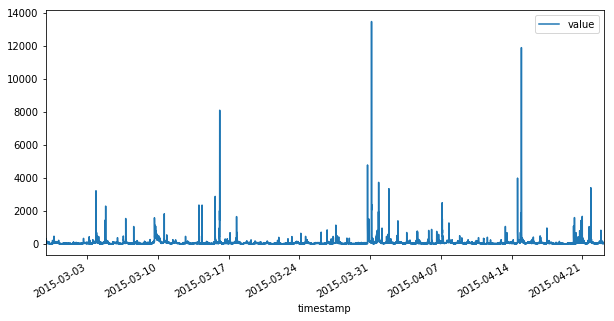

In [3]:
dataset.plot(x='timestamp', figsize=(10,5))
pyplot.show()

#### Data Pre-processing 
#### We devided time information 

In [4]:
data = pandas.DataFrame()
data['value'] = dataset.value
data['time'] = dataset.timestamp.apply(lambda t:t.time())
data['date'] = dataset.timestamp.apply(lambda t:t.date())
print(data.head(10))

   value      time        date
0    104  21:42:53  2015-02-26
1    100  21:47:53  2015-02-26
2     99  21:52:53  2015-02-26
3    154  21:57:53  2015-02-26
4    120  22:02:53  2015-02-26
5     90  22:07:53  2015-02-26
6     92  22:12:53  2015-02-26
7     71  22:17:53  2015-02-26
8    339  22:22:53  2015-02-26
9    178  22:27:53  2015-02-26


#### we transform the original data into a new formate

In [5]:
data_pre = pandas.DataFrame()
data_pre['value'] = dataset.value
data_pre['year'] = dataset.timestamp.apply(lambda t:t.year)
data_pre['month'] = dataset.timestamp.apply(lambda t:t.month)
data_pre['day'] = dataset.timestamp.apply(lambda t:t.day)
data_pre['hour'] = dataset.timestamp.apply(lambda t:t.hour)
data_pre['minute'] = dataset.timestamp.apply(lambda t:t.minute)
print(data_pre.head(10))

   value  year  month  day  hour  minute
0    104  2015      2   26    21      42
1    100  2015      2   26    21      47
2     99  2015      2   26    21      52
3    154  2015      2   26    21      57
4    120  2015      2   26    22       2
5     90  2015      2   26    22       7
6     92  2015      2   26    22      12
7     71  2015      2   26    22      17
8    339  2015      2   26    22      22
9    178  2015      2   26    22      27


#### There are very few types of data in this data set, so it is difficult for us to combine them again. A good solution is to subdivide them to increase the diversity and difference of the data. For this, we split the time data into specific year, month, day, hour and minute. In this way, you can not only explore the timeliness of the data, but also observe their periodicity. For the only data, this is time-divisional.

#### We use the new data for our models.
#### We pick up 3 different models for this project: IsolationForest, RandomForest and OneClassSVM
#### The First one is IsolationForest

##### initialize the model

In [6]:
IF = IsolationForest(max_samples=100)

##### passing data to the model

In [7]:
IF.fit(data_pre)

/Users/simonyang/Library/Python/2.7/lib/python/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/simonyang/Library/Python/2.7/lib/python/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
        max_features=1.0, max_samples=100, n_estimators=100, n_jobs=None,
        random_state=None, verbose=0)

##### Do prediction and make a new distribution map for bad data

/Users/simonyang/Library/Python/2.7/lib/python/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


   value  year  month  day  hour  minute  timestamp_int           timestamp  \
0    104  2015      2   26    21      42   1.424987e+09 2015-02-26 21:42:53   
1    100  2015      2   26    21      47   1.424987e+09 2015-02-26 21:47:53   
2     99  2015      2   26    21      52   1.424988e+09 2015-02-26 21:52:53   
3    154  2015      2   26    21      57   1.424988e+09 2015-02-26 21:57:53   
4    120  2015      2   26    22       2   1.424988e+09 2015-02-26 22:02:53   
5     90  2015      2   26    22       7   1.424988e+09 2015-02-26 22:07:53   
6     92  2015      2   26    22      12   1.424989e+09 2015-02-26 22:12:53   
7     71  2015      2   26    22      17   1.424989e+09 2015-02-26 22:17:53   
8    339  2015      2   26    22      22   1.424989e+09 2015-02-26 22:22:53   
9    178  2015      2   26    22      27   1.424990e+09 2015-02-26 22:27:53   

   normal0  
0       -1  
1       -1  
2       -1  
3       -1  
4       -1  
5       -1  
6       -1  
7       -1  
8       -1  


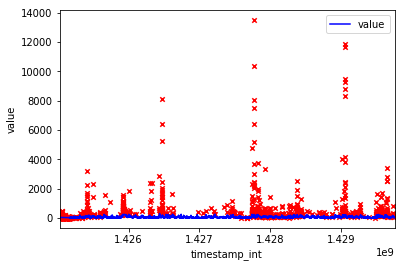

In [8]:
# predictions
y_pred_train = IF.predict(data_pre)

data_pre['timestamp_int'] = dataset.timestamp.apply(lambda t:t.timestamp())
data_pre['timestamp'] = dataset.timestamp
#data_pre['timestamp'] = data_ori['timestamp'].timestamp()
data_pre['normal0'] = y_pred_train
print(data_pre.head(10))

data_nor = data_pre[data_pre.normal0 == 1]
data_abn = data_pre[data_pre.normal0 == -1]

ax = pyplot.gca()
data_nor.plot(x='timestamp_int', y='value', ax=ax, color='blue')
data_abn.plot(kind='scatter', x='timestamp_int', y='value', ax = ax, marker='x', color='r')

pyplot.show()

#### Drop some useless data attribute for RandomForest

In [9]:
data_pre = data_pre.drop(['timestamp'], axis=1)
data_pre = data_pre.drop(['timestamp_int'], axis=1)

##### initialize the model and
##### passing data to the model

In [10]:
RF = RandomForestClassifier()
RF.fit(data_pre,y_pred_train)

/Users/simonyang/Library/Python/2.7/lib/python/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

##### Do prediction and make a new distribution map for bad data

   value  year  month  day  hour  minute  normal0  timestamp_int  \
0    104  2015      2   26    21      42       -1   1.424987e+09   
1    100  2015      2   26    21      47       -1   1.424987e+09   
2     99  2015      2   26    21      52       -1   1.424988e+09   
3    154  2015      2   26    21      57       -1   1.424988e+09   
4    120  2015      2   26    22       2       -1   1.424988e+09   
5     90  2015      2   26    22       7       -1   1.424988e+09   
6     92  2015      2   26    22      12       -1   1.424989e+09   
7     71  2015      2   26    22      17       -1   1.424989e+09   
8    339  2015      2   26    22      22       -1   1.424989e+09   
9    178  2015      2   26    22      27       -1   1.424990e+09   

            timestamp  normal1  
0 2015-02-26 21:42:53       -1  
1 2015-02-26 21:47:53       -1  
2 2015-02-26 21:52:53       -1  
3 2015-02-26 21:57:53       -1  
4 2015-02-26 22:02:53       -1  
5 2015-02-26 22:07:53       -1  
6 2015-02-26 22:12:5

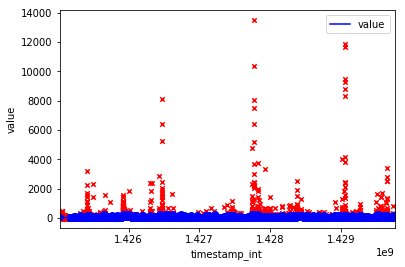

In [11]:
# predictions
y_pred_train = RF.predict(data_pre)

data_pre['timestamp_int'] = dataset.timestamp.apply(lambda t:t.timestamp())
data_pre['timestamp'] = dataset.timestamp
#data_pre['timestamp'] = data_ori['timestamp'].timestamp()
data_pre['normal1'] = y_pred_train
print(data_pre.head(10))

data_nor = data_pre[data_pre.normal1 == 1]
data_abn = data_pre[data_pre.normal1 == -1]

ax = pyplot.gca()
data_nor.plot(x='timestamp_int', y='value', ax=ax,color='blue',marker='o')
data_abn.plot(kind='scatter', x='timestamp_int', y='value', ax = ax, marker='x', color='r')

pyplot.show()

#### Drop some useless data attribute for OneClassSVM

In [12]:
data_pre = data_pre.drop(['timestamp'], axis=1)

##### initialize the model and
##### passing data to the model

/Users/simonyang/Library/Python/2.7/lib/python/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/simonyang/Library/Python/2.7/lib/python/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/simonyang/Library/Python/2.7/lib/python/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0    15752
1      150
Name: normal2, dtype: int64


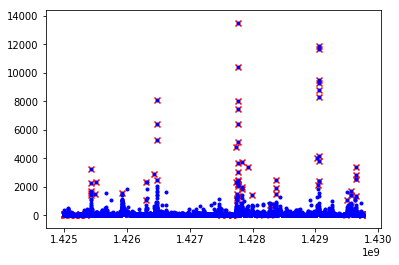

In [13]:
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data_pre)
# train one class SVM
model =  OneClassSVM(nu=0.95 * 0.01)
data = pandas.DataFrame(np_scaled)
model.fit(data)

data_pre['normal2'] = pandas.Series(model.predict(data))
data_pre['normal2'] = data_pre['normal2'].map( {1: 0, -1: 1} )
print(data_pre['normal2'].value_counts())

fig, ax = pyplot.subplots()

a = data_pre.loc[data_pre['normal2'] == 1, ['timestamp_int', 'value']]

ax.plot(data_pre['timestamp_int'], data_pre['value'], color='blue',marker='.',linestyle=' ')
ax.scatter(a['timestamp_int'], a['value'], color='red',marker='x')
pyplot.show()


#### In general, SVM has a sharper electrical measurement capability than RF and IF, and performs well on many abnormal data. RF and IF are very similar to the realization of this data set, and RF is slightly better.